# 8. Neural Networks and Deep Learning

This session, we'll learn about neural nets and build a model for classifying images of clothes.

## 8.1 Fashion Classification

Dataset:

- Full: https://github.com/alexeygrigorev/clothing-dataset
- Small: https://github.com/alexeygrigorev/clothing-dataset-small

Links:

- CS231n CNN for Visual Recognition: https://cs231n.github.io/

The dataset can be downloaded using the following command in the notebook:

```bash
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git
```

## 8.2 TensorFlow and Keras

- Installing TensorFlow
- Loading Images

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img

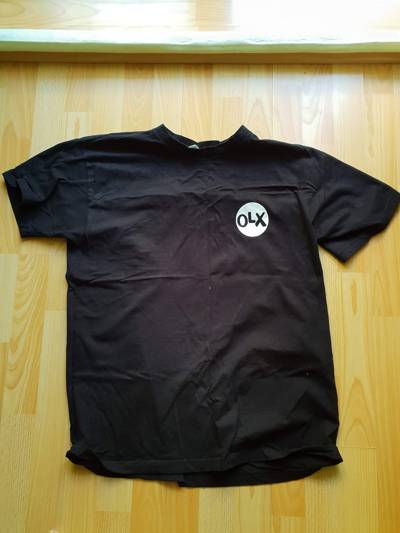

In [2]:
# Set image file path and load the image using keras 'load_img' function
path = '../input/mlzoomcampimageclassification/zoomcamp-image-classification/clothing-dataset-small/train/t-shirt'
filename = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{filename}'
load_img(fullname)

In [3]:
# Load image by setting image size of 299 x 299
img = load_img(fullname, target_size=(299, 299))

In [4]:
# Convert image into an array
x = np.array(img)
x

array([[[179, 171,  99],
        [179, 171,  99],
        [181, 173, 101],
        ...,
        [251, 253, 248],
        [251, 253, 248],
        [251, 253, 248]],

       [[188, 179, 110],
        [187, 178, 109],
        [186, 177, 108],
        ...,
        [251, 252, 247],
        [251, 252, 247],
        [251, 252, 246]],

       [[199, 189, 127],
        [200, 190, 128],
        [200, 190, 128],
        ...,
        [250, 251, 245],
        [250, 251, 245],
        [250, 251, 245]],

       ...,

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [183, 135,  24],
        [181, 133,  22],
        [183, 135,  24]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [182, 134,  23],
        [180, 132,  21],
        [182, 134,  23]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [181, 133,  22],
        [179, 131,  20],
        [182, 134,  23]]

In [5]:
# Check image shape
x.shape

(299, 299, 3)

Each row of the image represent a pixel and each element of these pixels represents color channels, where the first element is `Red`, second is `Green`, and third is of `Blue` color.

## 8.3 Pre-trained Convolutional Neural Networks

- Imagenet dataset: https://www.image-net.org/
- Pre-trained models: https://keras.io/api/applications/

In [6]:
# Import pre-trained model (Xception), preprocessing layer, and function to decode predictions
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [7]:
# Build model (use the weights the model was trained on)
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

2022-11-11 20:00:33.751905: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-11 20:00:33.752868: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-11 20:00:33.918177: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-11 20:00:33.919130: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-11 20:00:33.919972: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

91897856/91884032 [==============================] - 1s 0us/step


In [8]:
# Create an array of image (pass into list for batch_size)
X = np.array([x])
X, X.shape

(array([[[[179, 171,  99],
          [179, 171,  99],
          [181, 173, 101],
          ...,
          [251, 253, 248],
          [251, 253, 248],
          [251, 253, 248]],
 
         [[188, 179, 110],
          [187, 178, 109],
          [186, 177, 108],
          ...,
          [251, 252, 247],
          [251, 252, 247],
          [251, 252, 246]],
 
         [[199, 189, 127],
          [200, 190, 128],
          [200, 190, 128],
          ...,
          [250, 251, 245],
          [250, 251, 245],
          [250, 251, 245]],
 
         ...,
 
         [[165, 151,  76],
          [173, 159,  84],
          [171, 157,  82],
          ...,
          [183, 135,  24],
          [181, 133,  22],
          [183, 135,  24]],
 
         [[165, 151,  76],
          [173, 159,  84],
          [171, 157,  82],
          ...,
          [182, 134,  23],
          [180, 132,  21],
          [182, 134,  23]],
 
         [[165, 151,  76],
          [173, 159,  84],
          [171, 157,  82],
   

In [9]:
# Apply preprocessing layer
X = preprocess_input(X)
X

array([[[[ 0.4039216 ,  0.3411765 , -0.2235294 ],
         [ 0.4039216 ,  0.3411765 , -0.2235294 ],
         [ 0.41960788,  0.35686278, -0.20784312],
         ...,
         [ 0.96862745,  0.9843137 ,  0.94509804],
         [ 0.96862745,  0.9843137 ,  0.94509804],
         [ 0.96862745,  0.9843137 ,  0.94509804]],

        [[ 0.47450984,  0.4039216 , -0.1372549 ],
         [ 0.4666667 ,  0.39607847, -0.14509803],
         [ 0.45882356,  0.38823533, -0.15294117],
         ...,
         [ 0.96862745,  0.9764706 ,  0.9372549 ],
         [ 0.96862745,  0.9764706 ,  0.9372549 ],
         [ 0.96862745,  0.9764706 ,  0.92941177]],

        [[ 0.56078434,  0.48235297, -0.00392157],
         [ 0.5686275 ,  0.4901961 ,  0.00392163],
         [ 0.5686275 ,  0.4901961 ,  0.00392163],
         ...,
         [ 0.9607843 ,  0.96862745,  0.92156863],
         [ 0.9607843 ,  0.96862745,  0.92156863],
         [ 0.9607843 ,  0.96862745,  0.92156863]],

        ...,

        [[ 0.2941177 ,  0.18431377, -0

In [10]:
# Make predictions
pred = model.predict(X)
pred

2022-11-11 20:00:40.321709: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-11-11 20:00:42.446890: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


array([[3.23797984e-04, 1.57364309e-04, 2.14056068e-04, 1.52957378e-04,
        2.46565673e-04, 3.04462417e-04, 3.23487475e-04, 1.47259663e-04,
        2.04866097e-04, 1.48656152e-04, 1.95694069e-04, 2.11569102e-04,
        7.61278425e-05, 1.14591581e-04, 1.64077399e-04, 2.07021410e-04,
        1.96368012e-04, 1.44514721e-04, 1.40078628e-04, 1.73651686e-04,
        7.50312582e-04, 2.55688617e-04, 2.66562653e-04, 2.96249927e-04,
        3.71849019e-04, 2.81153480e-04, 2.16759698e-04, 2.26841803e-04,
        3.82646278e-04, 1.72122935e-04, 3.08604154e-04, 1.97759669e-04,
        3.93641938e-04, 4.78195900e-04, 2.90634373e-04, 3.26480600e-04,
        1.47040177e-04, 1.63522069e-04, 2.14072599e-04, 1.34214759e-04,
        2.41729897e-04, 6.72481954e-04, 2.53319769e-04, 1.42904100e-04,
        4.11025831e-04, 2.05692239e-04, 3.04202549e-04, 1.49993633e-04,
        2.00595197e-04, 2.28324730e-04, 2.97196646e-04, 2.30766993e-04,
        6.29546354e-04, 7.80995237e-04, 2.47868011e-04, 4.030103

In [11]:
# Decode prediction in readable formation
decode_predictions(pred)

49152/35363 [=========================================] - 0s 0us/step


[[('n03595614', 'jersey', 0.6792449),
  ('n02916936', 'bulletproof_vest', 0.03960036),
  ('n04370456', 'sweatshirt', 0.035299573),
  ('n03710637', 'maillot', 0.01088412),
  ('n04525038', 'velvet', 0.0018057581)]]

## 8.4 Convolutional Neural Networks

- Types of layers: convolutional and dense
- Convolutional layers and filters
- Dense layers

There more layers. Read here: https://cs231n.github.io/

## 8.5 Transfer Learning

- Reading data with `ImageDataGenerator`
- Train `Xception` on smaller images (150x150)

Better to run it with a GPU

In [12]:
# Import image data generator class
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
# Build image generator for training (takes preprocessing input function)
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Train images directory
train_imgs_dir= '../input/mlzoomcampimageclassification/zoomcamp-image-classification/clothing-dataset-small/train'

# Load in train dataset into train generator
train_ds = train_gen.flow_from_directory(directory=train_imgs_dir,
                                         target_size=(150,150),
                                         batch_size=32)

Found 3068 images belonging to 10 classes.


In [14]:
# Check total number of classes in train dataset
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [15]:
# Unpack features and target variables
X, y = next(train_ds)

In [16]:
# Labels are OHE
y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [17]:
# Create image generator for validation
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Validation image directory
val_imgs_dir = '../input/mlzoomcampimageclassification/zoomcamp-image-classification/clothing-dataset-small/validation'

# Load in image for validation
val_ds = val_gen.flow_from_directory(val_imgs_dir,
                                     target_size=(150,150),
                                     batch_size=32,
                                     shuffle=False) # False for validation

Found 341 images belonging to 10 classes.


In [18]:
# Build base model
base_model = Xception(weights='imagenet',
                      include_top=False, # to create custom dense layer
                      input_shape=(150,150,3))

# Freeze the convolutional base by preventing the weights being updated during training
base_model.trainable = False

# Define expected image shape as input
inputs = keras.Input(shape=(150,150,3))

# Feed inputs to the base model
base = base_model(inputs, training=False) # set False because the model contains BatchNormalization layer

# Convert matrices into vectors using pooling layer
vectors = keras.layers.GlobalAveragePooling2D()(base)

# Create dense layer of 10 classes
outputs = keras.layers.Dense(10)(vectors)

# Create model for training
model = keras.Model(inputs, outputs)

83697664/83683744 [==============================] - 0s 0us/step


In [19]:
# Define learning rate
learning_rate = 0.01

# Create optimizer
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

# Define loss function
loss = keras.losses.CategoricalCrossentropy(from_logits=True) # to keep the raw output of dense layer without applying softmax

# Compile the model
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=['accuracy']) # evaluation metric accuracy

In [20]:
# Train the model, validate it with validation data, and save the training history
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 29s 267ms/step - loss: 1.2061 - accuracy: 0.6783 - val_loss: 0.8849 - val_accuracy: 0.7566
Epoch 2/10
96/96 [==============================] - 16s 164ms/step - loss: 0.5908 - accuracy: 0.8126 - val_loss: 1.0673 - val_accuracy: 0.7537
Epoch 3/10
96/96 [==============================] - 16s 168ms/step - loss: 0.3752 - accuracy: 0.8713 - val_loss: 1.0095 - val_accuracy: 0.7595
Epoch 4/10
96/96 [==============================] - 16s 166ms/step - loss: 0.2208 - accuracy: 0.9192 - val_loss: 0.9784 - val_accuracy: 0.7742
Epoch 5/10
96/96 [==============================] - 16s 170ms/step - loss: 0.1532 - accuracy: 0.9443 - val_loss: 0.8793 - val_accuracy: 0.8182
Epoch 6/10
96/96 [==============================] - 16s 166ms/step - loss: 0.1231 - accuracy: 0.9583 - val_loss: 0.8814 - val_accuracy: 0.8035
Epoch 7/10
96/96 [==============================] - 16s 169ms/step - loss: 0.0792 - accuracy: 0.9762 - val_loss: 0.8968 - val_accuracy: 0.8152

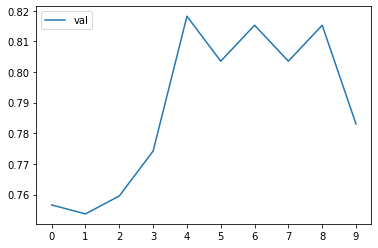

In [21]:
# Plot history of train and validation accuracy
# plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

plt.show()

## 8.6 Adjusting the Learning Rate

- What's the learning rate
- Trying different values